In [194]:
import pandas as pd
import numpy as np

In [195]:
price_df = pd.read_csv('data\\ETF_price_data.csv')

In [196]:
price_df.set_index('Dates', inplace=True)

In [197]:
ret_df = price_df/price_df.shift(1)-1
ret_df.dropna(inplace=True)
ret_df = ret_df.iloc[:, -6:]

In [198]:
from sklearn.decomposition import PCA

In [199]:
pca = PCA(n_components=4)

In [200]:
pca.fit(ret_df)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [201]:
pca.explained_variance_ratio_

array([0.80381619, 0.12889358, 0.04735778, 0.0156789 ])

In [202]:
new_X = pca.fit_transform(ret_df)[:,0]

In [203]:
ret_df.columns

Index(['TIP US Equity', 'AGG US Equity', 'IEF US Equity', 'TLT US Equity',
       'SHY US Equity', 'LQD US Equity'],
      dtype='object')

In [204]:
np.cov(new_X.reshape(-1), ret_df.iloc[:,3])

array([[0.0020122 , 0.00161757],
       [0.00161757, 0.00137461]])

In [205]:
import matplotlib.pyplot as plt

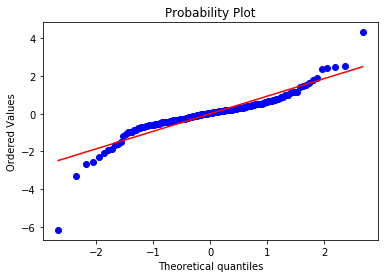

In [206]:
ncomp = 1
pca_w = pca.components_[ncomp,:]/pca.components_[ncomp,:].sum()
pd.Series(data = pca_w, index=ret_df.columns).sort_values()
pca_ret = (ret_df * pca_w).sum(axis=1)
pca_ret = (pca_ret-pca_ret.mean())/pca_ret.std()

import scipy.stats as stats
import pylab 
stats.probplot(pca_ret, dist="norm", plot=pylab)
pylab.show()


In [207]:
impvols = np.load('data\\impvol_data.npy')

In [208]:
dvols = np.log(impvols[1:]/impvols[0:-1])
print(dvols.shape)
leftvol = dvols.mean(axis=1)[:,0]
midvol = dvols.mean(axis=1)[:,5]
rightvol = dvols.mean(axis=1)[:,8]

(156, 2, 9)


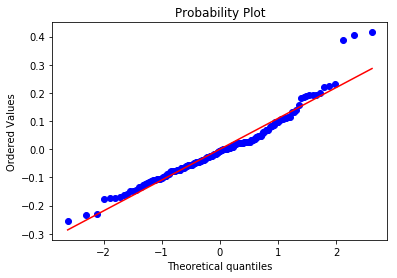

In [209]:
stats.probplot(dvols[:,1,0], dist="norm", plot=pylab)
pylab.show()

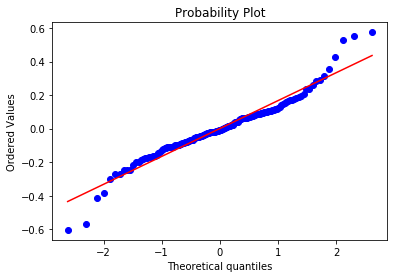

In [210]:
stats.probplot(rightvol, dist="norm", plot=pylab)
pylab.show()

In [211]:
from sklearn.linear_model import LinearRegression
X = np.array([leftvol, midvol, rightvol]).T
y = dvols[:,1,0]
reg = LinearRegression(fit_intercept=False).fit(X, y)
print(np.corrcoef(X.T))
print(reg.score(X, y))
print(reg.coef_)

In [215]:
from statsmodels.graphics.tsaplots import plot_acf

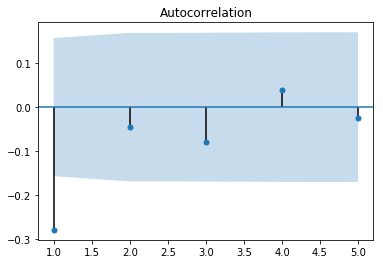

In [216]:
plot_acf(dvols[:,0,0], lags=5, zero=False, alpha=0.05)
plt.show()

In [217]:
ret_df.index[-len(impvols):]

Index(['5/31/06', '6/30/06', '7/31/06', '8/31/06', '9/29/06', '10/31/06',
       '11/30/06', '12/29/06', '1/31/07', '2/28/07',
       ...
       '8/31/18', '9/28/18', '10/31/18', '11/30/18', '12/31/18', '1/31/19',
       '2/28/19', '3/29/19', '4/30/19', '5/31/19'],
      dtype='object', name='Dates', length=157)

In [357]:
fed = pd.read_csv('..\\Data\\FEDFUNDS.csv')
fed.set_index('DATE', inplace=True)
fed.index = pd.to_datetime(fed.index)
dfed = (fed-fed.shift(1)).dropna()
dfed.head()

,FEDFUNDS
DATE,
2004-02-01,0.01
2004-03-01,-0.01
2004-04-01,0.00
2004-05-01,0.00
2004-06-01,0.03


In [358]:
cpi = pd.read_csv('..\\Data\\CPIAUCSL.csv')
cpi.set_index('DATE', inplace=True)
cpi.index = pd.to_datetime(cpi.index)
dcpi = np.log(cpi/cpi.shift(1)).dropna()

In [359]:
cs = pd.read_csv('..\\Data\\BAMLH0A0HYM2.csv')
cs.set_index('DATE', inplace=True)
cs.index = pd.to_datetime(cs.index)
cs.ffill(inplace=True)
cs_sub = pd.DataFrame(data=np.zeros_like(fed.values), index=fed.index, columns=['Credit'])

dgs = pd.read_csv('..\\Data\\DGS10.csv')
dgs.set_index('DATE', inplace=True)
dgs.index = pd.to_datetime(dgs.index)
dgs.ffill(inplace=True)

dgs_sub = pd.DataFrame(data=np.zeros_like(fed.values), index=fed.index, columns=['DGS'])
 

for idx in cs_sub.index:
    try:
        cs_sub.loc[idx] = cs.loc[idx].values[0]
    except KeyError:
        i = 1
        while True:
            newtime = idx + np.timedelta64(i, 'D')
            try:
                cs_sub.loc[idx] = cs.loc[newtime].values[0]
                break
            except:
                i += 1
    finally:
        pass
    
for idx in dgs_sub.index:
    try:
        dgs_sub.loc[idx] = dgs.loc[idx].values[0]
    except KeyError:
        i = 1
        while True:
            newtime = idx + np.timedelta64(i, 'D')
            try:
                dgs_sub.loc[idx] = dgs.loc[newtime].values[0]
                break
            except:
                i += 1
    finally:
        pass

    
dcs = (cs_sub-cs_sub.shift(1)).dropna()
ddgs = (dgs_sub - dgs_sub.shift(1)).dropna()

In [360]:
ddgs.head()

,DGS
DATE,
2004-02-01,-0.20
2004-03-01,-0.18
2004-04-01,-0.09
2004-05-01,0.62
2004-06-01,0.18


In [219]:
ret_df = ret_df.iloc[-len(dvols):]

In [318]:
ret_df.index

Index(['6/30/06', '7/31/06', '8/31/06', '9/29/06', '10/31/06', '11/30/06',
       '12/29/06', '1/31/07', '2/28/07', '3/30/07',
       ...
       '8/31/18', '9/28/18', '10/31/18', '11/30/18', '12/31/18', '1/31/19',
       '2/28/19', '3/29/19', '4/30/19', '5/31/19'],
      dtype='object', name='Dates', length=156)

In [361]:
dfed = dfed.iloc[-len(dvols):]
fed = fed.iloc[-len(dvols):]
cs = cs_sub.iloc[-len(dvols):]
dcs = dcs.iloc[-len(dvols):]
dgs = dgs_sub[-len(dvols):]
ddgs = ddgs[-len(dvols):]
cpi = cpi[-len(dvols):]
dcpi = dcpi[-len(dvols):]

In [362]:
ret_df['Fed Rate Change'] = dfed['FEDFUNDS'].values/100
ret_df['Fed Rate'] = fed['FEDFUNDS'].values/12/100
ret_df['CS Change'] = dcs['Credit'].values/100
ret_df['CS'] = cs['Credit'].values/12/100
ret_df['DGS Change'] = ddgs['DGS'].values/100
ret_df['DGS'] = dgs['DGS'].values/12/100
ret_df['CPI Change'] = dcpi['CPIAUCSL'].values
ret_df['CPI'] = cpi['CPIAUCSL'].values

In [384]:
X = ret_df[['Fed Rate Change', 'Fed Rate', 'CS Change', 'CS', 'DGS Change', 'DGS', 'CPI Change']].values

for etf_name in ['TIP US Equity', 'AGG US Equity', 'IEF US Equity', 'TLT US Equity', 'SHY US Equity', 'LQD US Equity']:
    y = ret_df[[etf_name]].values
    reg = LinearRegression(fit_intercept=False).fit(X, y)
    print(etf_name)
    print('R2: {:.2f}'.format(reg.score(X, y)))
    print('Coefficients: {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f}'.format(*list(reg.coef_[0])))
    print()

TIP US Equity
R2: 0.64
Coefficients: -0.13 1.17 -1.18 0.55 -5.83 -0.49 0.90 -0.00

AGG US Equity
R2: 0.83
Coefficients: -0.43 0.52 -0.69 0.25 -4.22 0.60 -0.36 0.00

IEF US Equity
R2: 0.89
Coefficients: -0.11 0.40 -0.17 0.28 -6.90 0.58 -0.22 0.00

TLT US Equity
R2: 0.81
Coefficients: 1.26 -0.07 -0.13 0.07 -13.74 0.26 -0.90 0.00

SHY US Equity
R2: 0.67
Coefficients: -0.74 0.81 0.03 0.10 -0.80 0.31 0.02 -0.00

LQD US Equity
R2: 0.66
Coefficients: 0.35 0.63 -1.82 0.44 -6.31 0.83 -1.39 0.00

